In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [9]:
X, y = make_classification(n_features = 5, n_redundant = 0, n_informative = 5, n_clusters_per_class = 1)

In [10]:
df = pd.DataFrame(X, columns = ['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.194310,-1.209564,0.476193,1.533006,1.175662,1
1,-0.798983,-0.976739,0.123422,-0.464104,-0.246157,0
2,-1.382079,-2.503363,1.601549,-0.657127,1.662206,1
3,-3.214299,0.130529,-0.203124,-1.813891,-0.598528,0
4,3.202807,-1.032640,0.510775,3.275745,2.725986,1


In [18]:
# function for raw sampling
def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace = True)

In [15]:
# function for the column sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [23]:
# function for combined sampling
def combined_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [24]:
df1 = combined_sampling(df, 0.5, 0.5)

C:\Users\altam\AppData\Local\Temp\ipykernel_12616\2067266941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [25]:
df2 = combined_sampling(df, 0.5, 0.5)

C:\Users\altam\AppData\Local\Temp\ipykernel_12616\2067266941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [26]:
df3 = combined_sampling(df, 0.5, 0.5)

C:\Users\altam\AppData\Local\Temp\ipykernel_12616\2067266941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [27]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col3', 'target'], dtype='object')
Index(['col1', 'col3', 'target'], dtype='object')
Index(['col3', 'col1', 'target'], dtype='object')


In [28]:
df3

,col3,col1,target
52,-1.916757,-1.618745,0
13,-2.523756,-0.643196,0
96,-3.017029,-0.299921,0
60,-1.579769,-0.824124,0
95,-1.052675,1.684417,1
5,2.180246,0.922925,1
98,4.000985,-1.338561,0
13,-2.523756,-0.643196,0
90,0.562049,0.568114,1
62,-1.448009,-0.004877,1


In [29]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [30]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [37]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')


DecisionTreeClassifier()

In [38]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'x[0] <= -0.359\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.25, 0.7, 'x[1] <= 1.017\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.375, 0.5, 'x[0] <= -1.301\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.3, 'x[1] <= 2.902\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.7, 'x[1] <= -1.745\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]')]

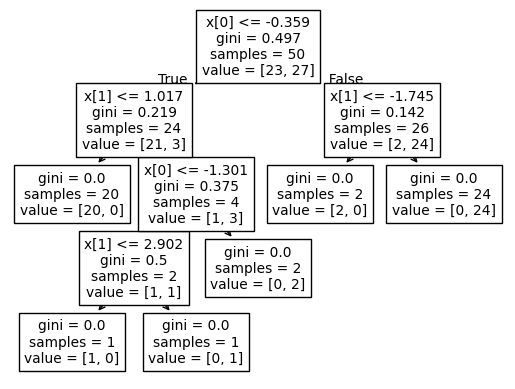

In [39]:
plot_tree(clf1)

[Text(0.29411764705882354, 0.9375, 'x[1] <= -0.471\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.11764705882352941, 0.8125, 'x[0] <= 2.521\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.20588235294117646, 0.875, 'True  '),
 Text(0.058823529411764705, 0.6875, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.17647058823529413, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.47058823529411764, 0.8125, 'x[0] <= -0.383\ngini = 0.432\nsamples = 38\nvalue = [12, 26]'),
 Text(0.38235294117647056, 0.875, '  False'),
 Text(0.29411764705882354, 0.6875, 'x[0] <= -1.36\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.17647058823529413, 0.5625, 'x[0] <= -1.891\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.11764705882352941, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4117647058823529, 0.5625, 'x[1] <= 0.23\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(

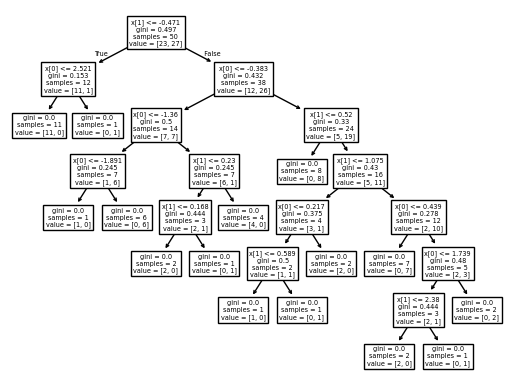

In [40]:
plot_tree(clf2)

[Text(0.4473684210526316, 0.9285714285714286, 'x[0] <= -0.129\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.10526315789473684, 0.7857142857142857, 'x[1] <= -0.111\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(0.2763157894736842, 0.8571428571428572, 'True  '),
 Text(0.05263157894736842, 0.6428571428571429, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.15789473684210525, 0.6428571428571429, 'x[0] <= -1.305\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.10526315789473684, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21052631578947367, 0.5, 'x[1] <= 1.236\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.15789473684210525, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2631578947368421, 0.35714285714285715, 'x[1] <= 1.781\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.21052631578947367, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3157894736842105, 0.21428571428571427, 'x[0] <= -

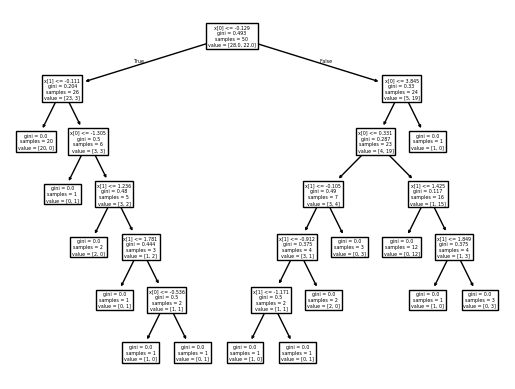

In [41]:
plot_tree(clf3)

In [42]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [43]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [44]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [45]:
df.sample(14, replace = True)

,col1,col2,col3,col4,col5,target
23,-0.353595,-0.845249,-1.092661,-1.556255,-1.424211,0
71,-0.990776,-0.194387,-4.615211,-0.395667,-1.360040,0
59,0.264302,-1.525600,2.248651,-0.182481,2.108880,1
4,3.202807,-1.032640,0.510775,3.275745,2.725986,1
39,0.033146,0.447485,-0.047390,-1.446664,0.643878,0
81,-0.216309,-0.382264,-0.166147,-1.585190,-1.335834,0
25,3.749387,-0.540230,1.714082,1.066202,4.119385,1
64,-0.576204,0.630431,-3.814728,-1.517068,-1.562305,0
77,1.015932,-0.731288,2.645172,2.011943,0.701182,1
39,0.033146,0.447485,-0.047390,-1.446664,0.643878,0
